# Visualization_pt1

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#form the path
path = r"C:\Users\Noah\4.3.24_INSTACART BASKET ANALYSIS"

In [6]:
#importing the merged data set
df_merged = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data', '4.9_pt1_merged.pkl'))

# creating charts

In [63]:
small.head()

,user_id,First Name,Surname,Gender,State,Age,date_joined,Dependents,fam_status,income,...,_merge,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending_level,loyalty_flag_spending,median_days_since_prior,loyalty_flag_freq
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-range product,Busiest day,Average Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-range product,Busiest day,Most Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Low-range product,Regularly busy,Average Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Low-range product,Busiest day,Average Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer
10,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Low-range product,Busiest day,Average Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer


In [7]:
# creating sample size since data set is too big for CPU
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [8]:
big = df_merged[dev]

In [9]:
small = df_merged[~dev]

In [10]:
# checking dfs to ensure accuracy
len(df_merged)

32399732

In [11]:
len(big) + len(small)

32399732

creating bar chart

<Axes: xlabel='orders_day_of_the_week'>

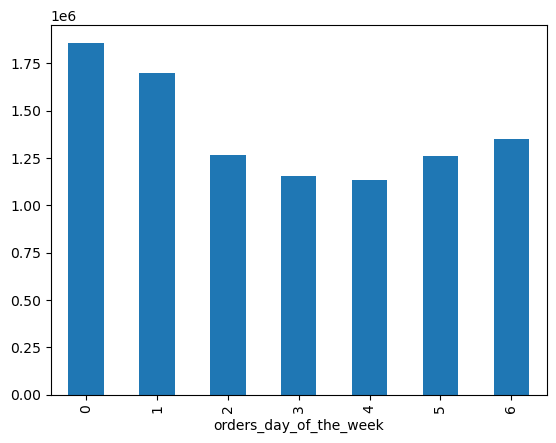

In [12]:
small['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

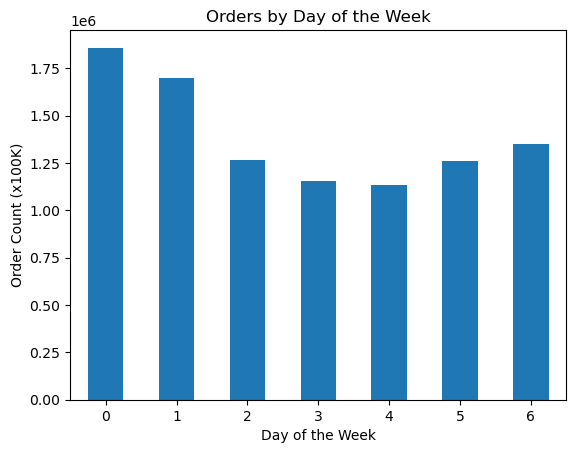

In [14]:
# bar chart - sorting orders chronological with further breakdown along Dependent data
small['orders_day_of_the_week'].value_counts().sort_index().plot.bar()
plt.xlabel('Day of the Week')
plt.ylabel('Order Count (x100K)')
plt.title('Orders by Day of the Week')
plt.xticks(rotation=0)
plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ords_dow.png'))

plt.show()

histogram

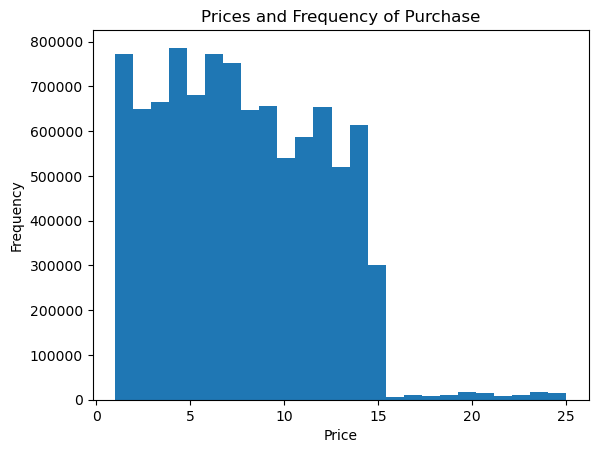

In [45]:
# HIstogram of price frequency
hist = small['prices'].plot.hist(bins=25)

# Adding labels
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Prices and Frequency of Purchase')

# Display the plot
plt.show()

In [47]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9_price_freq_.png'))

scatterplot

In [42]:
df_merged.loc[df_merged['prices'] <5, 'loyalty_flag'] = 'Low price'
df_merged.loc[(df_merged['prices'] >5) & (df_merged['prices'] <= 15), 'loyalty_flag'] = 'Middle price'
df_merged.loc[df_merged['prices'] > 15, 'loyalty_flag'] = 'High price'

In [44]:
# HIstogram of price frequency
df_merged['loyalty_flag'].plot.hist(bins=25)

# Adding labels
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

TypeError: no numeric data to plot

<Axes: xlabel='Age', ylabel='spending_level'>

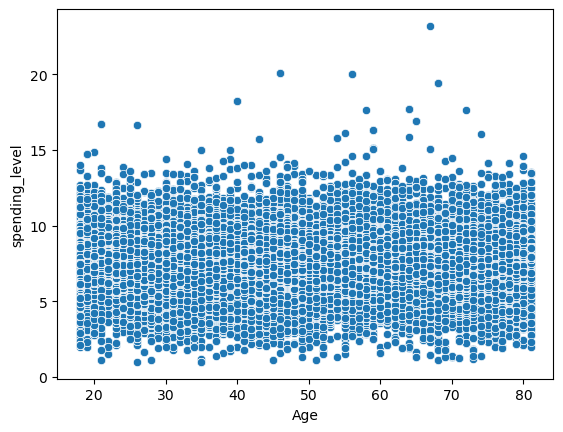

In [88]:
sns.scatterplot(x = 'Age', y = 'spending_level',data = small)

 we see here that Age is not correlated to spending level in any meaningful way. Poeple of any age are as likely to spend the same level as their counterparts of different ages. 

line chart

In [22]:
small.columns


Index(['user_id', 'First Name', 'Surname', 'Gender', 'State', 'Age',
       'date_joined', 'Dependents', 'fam_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'eval_set', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_level',
       'loyalty_flag_spending', 'median_days_since_prior',
       'loyalty_flag_freq'],
      dtype='object')

In [15]:
# creating smaller df to speed up process
df_2_small = small[['orders_day_of_the_week', 'prices']]

In [ ]:
line = sns.lineplot(data = small, x = 'orders_hour_of_day',y = 'prices')

# 3-7. vizzes for stakeholders

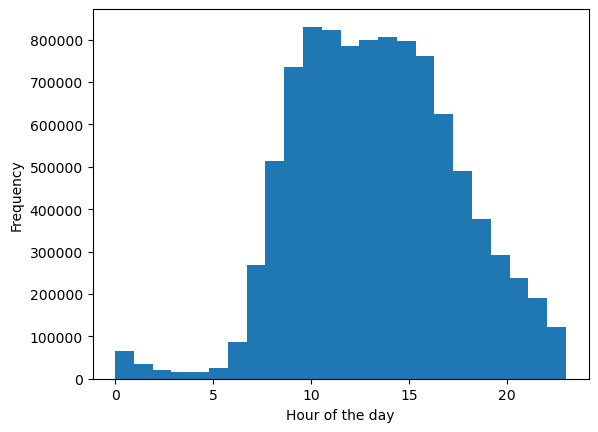

In [89]:
# 3. histogram for order hour of the day
small['order_hour_of_day'].plot.hist(bins = 24)
# Adding labels
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')

# Display the plot
plt.show()

Here we see that the most orders occur in the morning. Orders continue steadily until a drop off in the afternoon.

In [35]:
small.head(1)

,user_id,First Name,Surname,Gender,State,Age,date_joined,Dependents,fam_status,income,...,_merge,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending_level,loyalty_flag_spending,median_days_since_prior,loyalty_flag_freq
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid-range product,Busiest day,Average Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer


4. distribution of orders among customers in terms of loyalty.

In [48]:
# checking the data for loyalty flag info
freqcheck = df_merged['loyalty_flag']

In [49]:
freqcheckvalue = freqcheck.value_counts()

In [50]:
freqcheckvalue

loyalty_flag
Middle price        21860860
Low price            9900417
High price            412551
Regular customer      111177
Loyal customer         70542
New customer           44185
Name: count, dtype: int64

regular customers have more orders, followed by loyal and new.

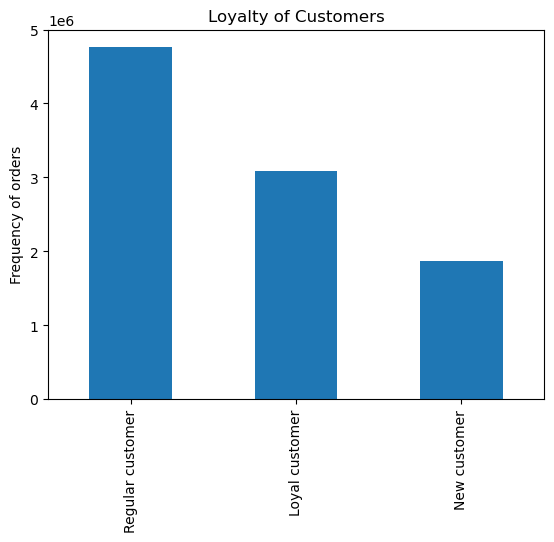

In [53]:
# 4. creating a bar chart with loyalty flag
small['loyalty_flag'].value_counts().plot.bar()
# Adding labels
plt.title('Loyalty of Customers')
plt.xlabel('')
plt.ylabel('Frequency of orders')

# Display the plot
plt.show()

the chart shows us that of the total 9,719,609 orders sampled, most orders are placed by regular customers (4,762,025, ~49%) followed by loyal customers (3,083,775, ~32%) and new customers (1,873,809 , ~19%).

5. line plot

C:\Users\Noah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Noah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


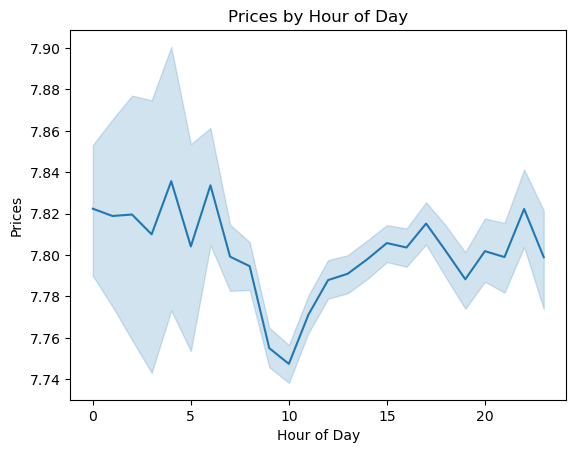

In [28]:
# 5. creating a line plot for prices throughout the day
line = sns.lineplot(data = small, x = 'order_hour_of_day',y = 'prices')
plt.xlabel('Hour of Day')
plt.ylabel('Prices')
plt.title('Prices by Hour of Day')
plt.xticks(rotation=0)
plt.show()


Here we see that certain times of the day- particularly the busiest shopping time of 10AM - is where we see the lowest price items being purchased. We can interpret this to mean that shoppers at peak hours tend to go for lower cost items. We also see a high degree of variance in the early hours of the day, meaning early shoppers tend to vary widely in their tastes. Afternoon and night shoppers spend more on average.

In [30]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_price.png'))

C:\Users\Noah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Noah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


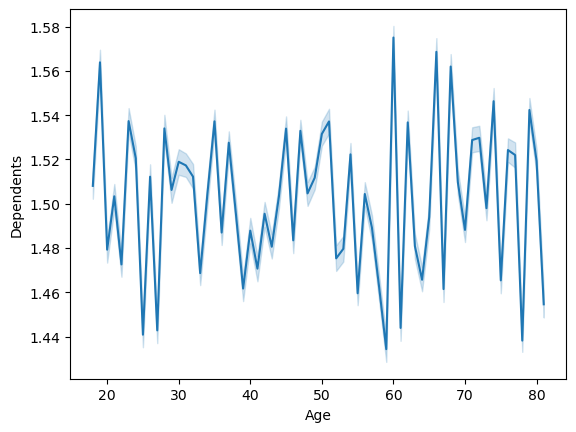

In [47]:
# 6. line chart exploring connection between age and number of dependents
line = sns.lineplot(data = small, x = 'Age',y = 'Dependents')

From this chart we see that there is little to no correlation between age and number of dependents. A person is as likely to have a high number of dependents at 20 years old as they are at 60, and vice versa with a low number at a young or old age. 

<Axes: xlabel='Age', ylabel='income'>

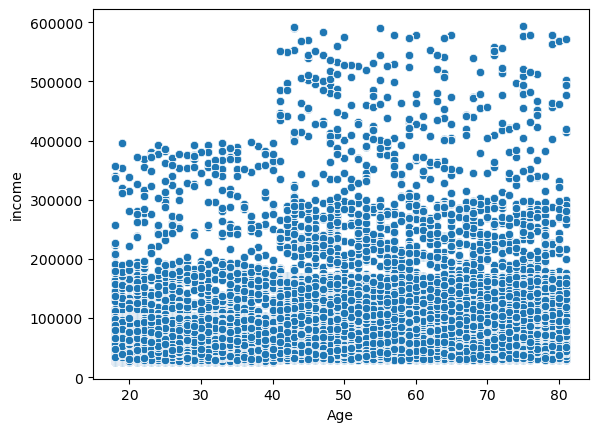

In [48]:
# 7. scatterplot to explore connection between age and income
sns.scatterplot(x = 'Age', y = 'income',data = small)

First and foremost, we see that across the board there are low income earners. A majority of people earn less than 100K at any age on the chart.

Further analysis reveals that at around 40 years of age there is a spike in earnings. This indicates that once a person enters their fourth decade they are able to break through the 400K income barrier that younger people are unable to reach.
We also see a pronounced density of people earning between 200K and 300K past age 40.

It is safe to assume that older people are more likely to earn more.